In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline 
plt.style.use('ggplot')

Note: you may need to restart the kernel to use updated packages.


In [3]:
import zipfile
z=zipfile.ZipFile("TumorDataSet.zip")
z.extractall()

In [4]:
#data preprocessing
folder='yes/'
count=1
for filename in os.listdir(folder):
    source=folder + filename
    destination=folder + "Y_" + str(count) + '.jpg'
    os.rename(source, destination)
    count+=1
    
print("All files are renamed in the yes directory")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'yes/y0.jpg' -> 'yes/Y_1.jpg'

In [5]:
#data preprocessing
folder='no/'
count=1
for filename in os.listdir(folder):
    source=folder + filename
    destination=folder + "N_" + str(count) + '.jpg'
    os.rename(source, destination)
    count+=1
    
print("All files are renamed in the no directory")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'no/no0.jpg' -> 'no/N_1.jpg'

In [6]:
listyes = os.listdir('yes/')
number_files_yes = len(listyes)
print(number_files_yes)

listyes = os.listdir('no/')
number_files_no = len(listyes)
print(number_files_no)

3000
3000


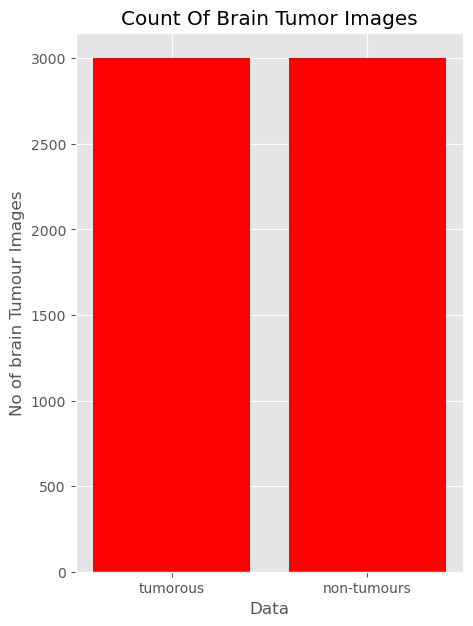

In [7]:
data={'tumorous': number_files_yes,'non-tumours': number_files_no}
typex = data.keys()
values = data.values() 


fig = plt.figure(figsize=(5,7))
plt.bar(typex, values, color='red')
plt.xlabel('Data')
plt.ylabel('No of brain Tumour Images')
plt.title("Count Of Brain Tumor Images")
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,  ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
def timing(sec_elapsed):
    h=int(sec_elapsed / (60*60))
    m=int(sec_elapsed % (60*60) / 60)
    s=sec_elapsed % 60
    
    return f"{h}:{m}:{s}"

In [20]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [21]:
import time
start_time = time.time()

yes_path = 'yes' 
no_path = 'no'

augmented_data_path = 'augmented_data/'

augmented_data(file_dir = yes_path, n_generated_samples=2, save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir = no_path, n_generated_samples=2, save_to_dir=augmented_data_path+'no')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:4:33.69606423377991


In [28]:
def data_summary(main_path):
    yes_path = 'augmented_data/yes/'
    no_path = 'augmented_data/no/'
    n_pos=len(os.listdir(yes_path))
    n_neg=len(os.listdir(no_path))
    
    n = (n_pos + n_neg)
    
    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n
    print(f"Number of sample:{n}")
    print(f"{n_pos} Number of positive in %:{pos_per}%")
    print(f"{n_neg} Number of negative in %{neg_per}%")
    
    
    

In [29]:
data_summary(augumented_data_path)

Number of sample:9000
4500 Number of positive in %:50.0%
4500 Number of negative in %50.0%


In [31]:
listyes = os.listdir('augmented_data/yes/')
number_files_yes = len(listyes)
print(number_files_yes)

listyes = os.listdir('augmented_data/no/')
number_files_no = len(listyes)
print(number_files_no)

4500
4500


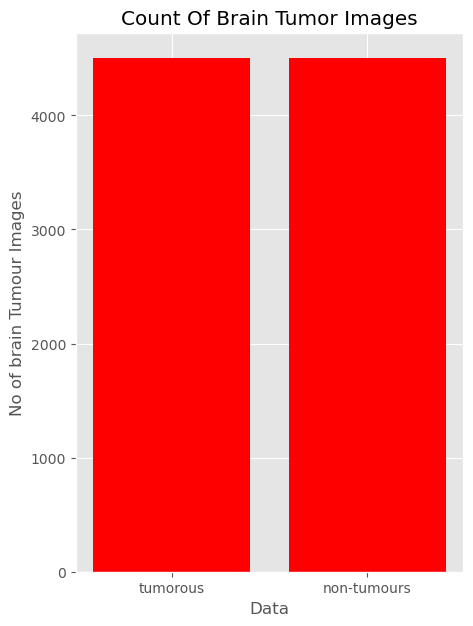

In [32]:
data={'tumorous': number_files_yes,'non-tumours': number_files_no}
typex = data.keys()
values = data.values() 


fig = plt.figure(figsize=(5,7))
plt.bar(typex, values, color='red')
plt.xlabel('Data')
plt.ylabel('No of brain Tumour Images')
plt.title("Count Of Brain Tumor Images")
plt.show()

In [ ]:
Data Preprocessing